In [1]:
import pandas as pd
import numpy as np

# Load the final dataset that already includes all merged data and differential features.
try:
    df_features = pd.read_csv('ufc_fight_dataset_with_diffs.csv')
    print("Successfully loaded the fully engineered dataset.")
    print(f"Dataset shape: {df_features.shape}")
    display(df_features.head())
except FileNotFoundError:
    print("ERROR: 'ufc_fight_dataset_with_diffs.csv' not found. Please ensure it's in the correct directory.")

Successfully loaded the fully engineered dataset.
Dataset shape: (21510, 76)


,Outcome,Fighter,Opponent,Event,Method,Round,Time,fighter_url,opponent_url,blue_Name,...,wins_diff,losses_diff,draws_diff,age_diff,stance_:open_stance_diff,stance_:orthodox_diff,stance_:sideways_diff,stance_:southpaw_diff,stance_:switch_diff,stance_unknown_diff
0,loss,Don Carlo-Clauss,Sam Oropeza,"Strikeforce - Fedor vs. SilvaFeb. 12, 2011",KO/TKOPunches,1.0,4:10,http://ufcstats.com/fighter-details/f59a6de8a5...,http://ufcstats.com/fighter-details/6b8db407d4...,Don Carlo-Clauss,...,-3,4,0,NaN,0,0,0,0,0,0
1,loss,Alessio Di Chirico,Roman Kopylov,"UFC Fight Night: Gane vs. TuivasaSep. 03, 2022",KO/TKOPunches,3.0,1:09,http://ufcstats.com/fighter-details/77d7295d1b...,http://ufcstats.com/fighter-details/9d83f6da77...,Alessio Di Chirico,...,-1,4,0,1.4,0,1,0,-1,0,0
2,loss,Alessio Di Chirico,Abdul Razak Alhassan,"UFC Fight Night: Barboza vs. ChikadzeAug. 28, ...",KO/TKOKick,1.0,0:17,http://ufcstats.com/fighter-details/77d7295d1b...,http://ufcstats.com/fighter-details/eae431e700...,Alessio Di Chirico,...,1,0,0,-4.3,0,0,0,0,0,0
3,win,Alessio Di Chirico,Joaquin Buckley,"UFC Fight Night: Holloway vs. KattarJan. 16, 2021",KO/TKOKick,1.0,2:12,http://ufcstats.com/fighter-details/77d7295d1b...,http://ufcstats.com/fighter-details/b943760049...,Alessio Di Chirico,...,-8,0,0,4.4,0,1,0,-1,0,0
4,loss,Alessio Di Chirico,Zak Cummings,"UFC Fight Night: Smith vs. RakicAug. 29, 2020",U-DEC,3.0,5:00,http://ufcstats.com/fighter-details/77d7295d1b...,http://ufcstats.com/fighter-details/4ba8d454f7...,Alessio Di Chirico,...,-12,0,0,-5.4,0,1,0,-1,0,0


In [3]:
unique_methods = df_features['Method'].unique()
print(f"Unique values of Method: {unique_methods}")


Unique values of Method: ['KO/TKOPunches' 'KO/TKOKick' 'U-DEC' 'S-DEC' 'KO/TKOKnee'
 'SUBTriangle Choke' 'Overturned' 'KO/TKO' 'KO/TKOPunch' "SUBD'Arce Choke"
 'SUBArmbar' 'SUBRear Naked Choke' 'CNC' 'SUBHeel Hook' 'SUBArm Triangle'
 'KO/TKOElbows' 'SUBGuillotine Choke' 'SUBKeylock' 'SUBTriangle Armbar'
 'SUBKneebar' 'SUBKimura' 'KO/TKOKnees' 'DQ' 'SUBInjury' 'M-DEC'
 'SUBNeck Crank' 'KO/TKOFlying Knee' 'KO/TKOSpinning Back Kick'
 'KO/TKOSpinning Back Fist' 'SUBAnaconda Choke' 'KO/TKOKicks'
 'SUBEzekiel Choke' 'KO/TKOElbow' 'Other' 'KO/TKOSpinning Back Elbow'
 'SUBAnkle Lock' 'KO/TKOSlam' 'SUBGogo Plata' 'OverturnedGuillotine Choke'
 'SUBToe Hold' 'SUBBulldog Choke' 'SUBShoulder Choke' 'SUBCalf Slicer'
 'SUBOther' 'OverturnedPunch' 'KO/TKOHeadbutts' 'SUB' 'SUBOmoplata' nan
 'SUBNorth-South Choke' 'OverturnedRear Naked Choke' 'SUBStraight Armbar'
 'OverturnedPunches' 'SUBInverted Triangle' 'SUBOther - Lock'
 'SUBOther - Choke' 'SUBGi Choke' 'KO/TKOStomps' 'SUBVon Flue Choke'
 'DQRear Na

In [4]:
import pandas as pd
import numpy as np

# This cell assumes you are in a new notebook for multiclass classification.

# --- 1. Load Your Final Featured Dataset ---
try:
    df_features = pd.read_csv('ufc_fight_dataset_with_diffs.csv')
    print("Successfully loaded 'ufc_fight_dataset_with_diffs.csv'.")
    print(f"Original dataset shape: {df_features.shape}")
except FileNotFoundError:
    print("ERROR: 'ufc_fight_dataset_with_diffs.csv' not found.")


# --- 2. Clean the 'Method' Column ---

def clean_method(method):
    """
    This helper function takes a raw method string and maps it to one of
    our three main categories (KO/TKO, Submission, Decision), or to None
    if it's an unpredictable/invalid outcome.
    """
    if pd.isna(method):
        return None
    
    # Standardize to uppercase for easier matching
    method_upper = str(method).upper()
    
    # Check for our main categories using .startswith()
    if method_upper.startswith('KO/TKO'):
        return 'KO/TKO'
    if method_upper.startswith('SUB'):
        return 'Submission'
    
    # Check for all types of decisions
    if 'DEC' in method_upper or method_upper == 'DECISION':
        return 'Decision'
    
    # Any other method (DQ, Overturned, CNC, etc.) is not a standard win
    # and will be excluded from our model training.
    return None

# Apply the cleaning function to the 'Method' column
df_features['Method_Cleaned'] = df_features['Method'].apply(clean_method)

# Drop the rows where the method was not one of our three main categories
df_model_ready = df_features.dropna(subset=['Method_Cleaned'])

print(f"\nDataset shape after cleaning methods: {df_model_ready.shape}")


# --- 3. Verify the Cleanup ---
# Let's look at the value counts of our new, clean method column.
print("\nValue counts for the cleaned 'Method' column:")
print(df_model_ready['Method_Cleaned'].value_counts())


# Display the first few rows to see the new column
display(df_model_ready[['Method', 'Method_Cleaned']].head())

Successfully loaded 'ufc_fight_dataset_with_diffs.csv'.
Original dataset shape: (21510, 76)

Dataset shape after cleaning methods: (21182, 77)

Value counts for the cleaned 'Method' column:
Method_Cleaned
Decision      9384
KO/TKO        7232
Submission    4566
Name: count, dtype: int64


,Method,Method_Cleaned
0,KO/TKOPunches,KO/TKO
1,KO/TKOPunches,KO/TKO
2,KO/TKOKick,KO/TKO
3,KO/TKOKick,KO/TKO
4,U-DEC,Decision


Prepared features (X) with shape: (21182, 64)
Prepared target (y) with shape: (21182,)

Missing values filled. Total nulls remaining: 0

Data successfully split for multiclass training.

Training the multiclass Random Forest model...
Training complete.

Multiclass Model Accuracy (Method of Victory): 0.7536 (75.36%)

Multiclass Classification Report:
              precision    recall  f1-score   support

    Decision       0.84      0.96      0.89      1877
      KO/TKO       0.69      0.71      0.70      1447
  Submission       0.61      0.41      0.49       913

    accuracy                           0.75      4237
   macro avg       0.71      0.69      0.69      4237
weighted avg       0.74      0.75      0.74      4237


Multiclass Confusion Matrix:


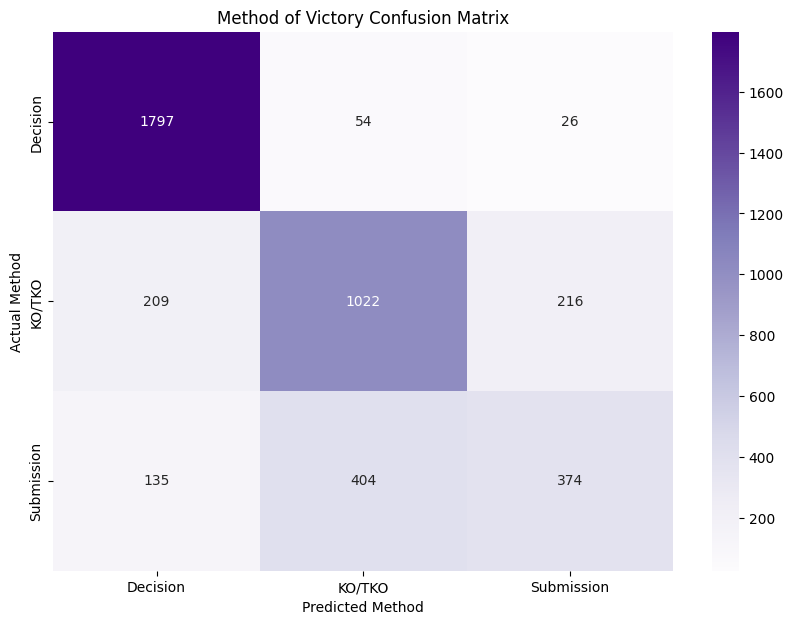

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# This cell assumes 'df_model_ready' exists from running the previous cell.

# --- Step 1: Define Target (y) and Features (X) ---

# The target 'y' is our newly cleaned 'Method_Cleaned' column.
y_method = df_model_ready['Method_Cleaned']

# The features 'X' are all the numeric columns. We must drop all identifiers
# and text-based columns, as well as our target variable.
cols_to_drop = [
    'Outcome', 'Fighter', 'Opponent', 'Event', 'Method', 'Time', 'Method_Cleaned',
    'fighter_url', 'opponent_url', 'blue_fighter_url', 'red_fighter_url',
    'blue_Name', 'red_Name'
]

X_method = df_model_ready.drop(columns=cols_to_drop)

print(f"Prepared features (X) with shape: {X_method.shape}")
print(f"Prepared target (y) with shape: {y_method.shape}")


# --- Step 2: Impute Missing Values and Split the Data ---

# Fill any remaining NaN values in our feature set with the median of each column
X_method.fillna(X_method.median(), inplace=True)
print(f"\nMissing values filled. Total nulls remaining: {X_method.isnull().sum().sum()}")

# Now we split the data into training and testing sets.
# IMPORTANT: We use 'stratify=y_method' to ensure that the proportion of
# KO/TKO, Submission, and Decision is the same in both the train and test sets.
# This is critical for evaluating a multiclass model properly.
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_method, y_method, test_size=0.2, random_state=42, stratify=y_method
)
print("\nData successfully split for multiclass training.")


# --- Step 3: Train and Evaluate the Multiclass Random Forest Model ---

# The same RandomForestClassifier can handle this multiclass task.
rf_multi_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("\nTraining the multiclass Random Forest model...")
rf_multi_model.fit(X_train_m, y_train_m)
print("Training complete.")

# --- Step 4: Analyze the Model's Performance ---
y_pred_m = rf_multi_model.predict(X_test_m)
accuracy_m = accuracy_score(y_test_m, y_pred_m)

print(f"\nMulticlass Model Accuracy (Method of Victory): {accuracy_m:.4f} ({(accuracy_m*100):.2f}%)")

# The classification report will now show performance for each individual method
print("\nMulticlass Classification Report:")
print(classification_report(y_test_m, y_pred_m))

# The confusion matrix shows how the model confuses the different methods
print("\nMulticlass Confusion Matrix:")
# We define the labels to ensure the matrix is in the order we expect.
class_labels = ['Decision', 'KO/TKO', 'Submission']
cm_m = confusion_matrix(y_test_m, y_pred_m, labels=class_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_m, annot=True, fmt='d', cmap='Purples', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual Method')
plt.xlabel('Predicted Method')
plt.title('Method of Victory Confusion Matrix')
plt.show()

In [6]:
import joblib

# This cell assumes 'rf_multi_model' exists from the previous cell.

# Define a new filename for our multiclass model
multiclass_model_filename = 'ufc_multiclass_model.joblib'

# Save the new multiclass model object
joblib.dump(rf_multi_model, multiclass_model_filename)

print(f"SUCCESS: Your new multiclass model has been saved to '{multiclass_model_filename}'")

SUCCESS: Your new multiclass model has been saved to 'ufc_multiclass_model.joblib'


In [2]:
import pandas as pd
import numpy as np
import joblib
import json

# --- 1. Load All Required Assets for Prediction ---
try:
    # Load the corrected engineered fighter data
    fighters_df = pd.read_csv('ufc_fighters_engineered_corrected.csv')
    
    # Load BOTH trained models and BOTH column lists
    winner_model = joblib.load('ufc_random_forest_model_tuned.joblib')
    method_model = joblib.load('ufc_multiclass_model.joblib')
    
    with open('winner_model_columns.json', 'r') as f:
        winner_model_cols = json.load(f)
    with open('method_model_columns.json', 'r') as f:
        method_model_cols = json.load(f)
        
    print("All models and required data loaded successfully.")
    
except FileNotFoundError as e:
    print(f"ERROR: A required file was not found. {e}")


# --- 2. Define Helper and Final Symmetrical Prediction Functions ---

def _get_full_prediction_from_perspective(fighter1_name, fighter2_name, all_fighters_data, win_cols, meth_cols, win_model, meth_model):
    """
    Helper function to get raw prediction probabilities from a single perspective.
    Returns a tuple of (winner_probabilities, method_probabilities) or an error dict.
    """
    fighter1_stats = all_fighters_data[all_fighters_data['Name'] == fighter1_name]
    fighter2_stats = all_fighters_data[all_fighters_data['Name'] == fighter2_name]
    if fighter1_stats.empty or fighter2_stats.empty:
        missing = fighter1_name if fighter1_stats.empty else fighter2_name
        return {"error": f"Fighter '{missing}' not found."}, None

    fighter1_stats, fighter2_stats = fighter1_stats.iloc[0], fighter2_stats.iloc[0]
    blue_stats, red_stats = fighter1_stats.add_prefix('blue_'), fighter2_stats.add_prefix('red_')
    diff_features = {}
    for blue_col in blue_stats.index:
        if blue_col.startswith('blue_') and 'url' not in blue_col and 'Name' not in blue_col:
            red_col, base_name = blue_col.replace('blue_', 'red_'), blue_col.replace('blue_', '')
            if red_col in red_stats.index:
                diff_col_name = base_name.lower().replace(' ', '_').replace('.', '') + '_diff'
                diff_features[diff_col_name] = blue_stats[blue_col] - red_stats[red_col]
    
    single_fight_data = {**blue_stats, **red_stats, **diff_features}
    prediction_df_base = pd.DataFrame([single_fight_data])

    X_winner = prediction_df_base.reindex(columns=win_cols, fill_value=0)
    winner_probs = win_model.predict_proba(X_winner)[0]

    X_method = prediction_df_base.reindex(columns=meth_cols, fill_value=0)
    method_probs = meth_model.predict_proba(X_method)[0]
    
    return winner_probs, method_probs


def predict_fight_symmetrical(fighter_a, fighter_b, all_fighters_data, win_cols, meth_cols, win_model, meth_model):
    """
    Calculates a final, symmetrical prediction for both winner and method
    by running the models from both perspectives and averaging the results.
    """
    # Prediction 1: A is in the blue corner
    winner_probs1, method_probs1 = _get_full_prediction_from_perspective(fighter_a, fighter_b, all_fighters_data, win_cols, meth_cols, win_model, meth_model)
    if "error" in winner_probs1: return winner_probs1

    # Prediction 2: B is in the blue corner
    winner_probs2, method_probs2 = _get_full_prediction_from_perspective(fighter_b, fighter_a, all_fighters_data, win_cols, meth_cols, win_model, meth_model)
    if "error" in winner_probs2: return winner_probs2

    # Average the winner probabilities
    prob_a_wins_as_blue = winner_probs1[1]  # P(A wins | A is blue)
    prob_a_wins_as_red = 1 - winner_probs2[1] # P(A wins | A is red) = 1 - P(B wins | B is blue)
    final_prob_a_wins = (prob_a_wins_as_blue + prob_a_wins_as_red) / 2
    final_prob_b_wins = 1 - final_prob_a_wins
    
    # Average the method probabilities
    # This provides a balanced view of the method likelihood, independent of the winner.
    avg_method_probs = (method_probs1 + method_probs2) / 2
    method_classes = meth_model.classes_
    predicted_method = method_classes[np.argmax(avg_method_probs)]

    # Format the final result
    result = {
        "matchup": f"{fighter_a} vs. {fighter_b}",
        "predicted_winner": fighter_a if final_prob_a_wins > final_prob_b_wins else fighter_b,
        "winner_confidence": f"{max(final_prob_a_wins, final_prob_b_wins)*100:.2f}%",
        "win_probabilities": {
            fighter_a: f"{final_prob_a_wins*100:.2f}%",
            fighter_b: f"{final_prob_b_wins*100:.2f}%",
        },
        "predicted_method": predicted_method,
        "method_probabilities": {
            method_classes[i]: f"{avg_method_probs[i]*100:.2f}%" for i in range(len(method_classes))
        }
    }
    return result

# --- 3. Test the Final Symmetrical Function! ---
print("\n--- Final Symmetrical Prediction ---")
# The order of names here no longer affects the final probabilities
prediction = predict_fight_symmetrical(
    'Ilia Topuria', 'Charles Oliveira', 
    fighters_df, 
    winner_model_cols, method_model_cols,
    winner_model, method_model
)

print(json.dumps(prediction, indent=2))

All models and required data loaded successfully.

--- Final Symmetrical Prediction ---
{
  "matchup": "Ilia Topuria vs. Charles Oliveira",
  "predicted_winner": "Ilia Topuria",
  "winner_confidence": "74.56%",
  "win_probabilities": {
    "Ilia Topuria": "74.56%",
    "Charles Oliveira": "25.44%"
  },
  "predicted_method": "KO/TKO",
  "method_probabilities": {
    "Decision": "7.50%",
    "KO/TKO": "58.50%",
    "Submission": "34.00%"
  }
}


In [3]:
import pandas as pd
import json
from datetime import datetime

def predict_multiple_fights(fight_list, fighters_data, win_cols, meth_cols, win_model, meth_model):
    """
    Predict outcomes for multiple fights at once.
    
    Args:
        fight_list: List of fight strings in format "Fighter A vs. Fighter B"
        fighters_data, win_cols, meth_cols, win_model, meth_model: Model components
    
    Returns:
        Dictionary containing all predictions and summary statistics
    """
    results = {
        "event_summary": {
            "total_fights": len(fight_list),
            "processed_fights": 0,
            "failed_fights": 0,
            "prediction_timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        },
        "fight_predictions": [],
        "failed_predictions": [],
        "method_distribution": {"Decision": 0, "KO/TKO": 0, "Submission": 0}
    }
    
    for i, fight_string in enumerate(fight_list, 1):
        try:
            # Parse the fight string
            if " vs. " in fight_string:
                fighter_a, fighter_b = fight_string.split(" vs. ")
                fighter_a, fighter_b = fighter_a.strip(), fighter_b.strip()
            else:
                results["failed_predictions"].append({
                    "fight": fight_string,
                    "error": "Invalid format. Use 'Fighter A vs. Fighter B'"
                })
                results["event_summary"]["failed_fights"] += 1
                continue
            
            # Get prediction
            prediction = predict_fight_symmetrical(
                fighter_a, fighter_b, 
                fighters_data, win_cols, meth_cols, win_model, meth_model
            )
            
            if "error" in prediction:
                results["failed_predictions"].append({
                    "fight": fight_string,
                    "error": prediction["error"]
                })
                results["event_summary"]["failed_fights"] += 1
            else:
                # Add fight number for easy reference
                prediction["fight_number"] = i
                results["fight_predictions"].append(prediction)
                results["event_summary"]["processed_fights"] += 1
                
                # Update method distribution
                predicted_method = prediction["predicted_method"]
                if predicted_method in results["method_distribution"]:
                    results["method_distribution"][predicted_method] += 1
                    
        except Exception as e:
            results["failed_predictions"].append({
                "fight": fight_string,
                "error": f"Unexpected error: {str(e)}"
            })
            results["event_summary"]["failed_fights"] += 1
    
    return results

def display_event_predictions(results):
    """
    Display the results in a clean, readable format.
    """
    print("=" * 80)
    print("UFC EVENT PREDICTIONS")
    print("=" * 80)
    
    # Event Summary
    summary = results["event_summary"]
    print(f"\n📊 EVENT SUMMARY:")
    print(f"   Total Fights: {summary['total_fights']}")
    print(f"   Successfully Predicted: {summary['processed_fights']}")
    print(f"   Failed Predictions: {summary['failed_fights']}")
    print(f"   Prediction Time: {summary['prediction_timestamp']}")
    
    # Method Distribution
    if summary['processed_fights'] > 0:
        print(f"\n🥊 PREDICTED METHOD DISTRIBUTION:")
        for method, count in results["method_distribution"].items():
            percentage = (count / summary['processed_fights']) * 100
            print(f"   {method}: {count} fights ({percentage:.1f}%)")
    
    # Individual Fight Predictions
    print(f"\n🔮 FIGHT-BY-FIGHT PREDICTIONS:")
    print("-" * 80)
    
    for fight in results["fight_predictions"]:
        print(f"\nFight #{fight['fight_number']}: {fight['matchup']}")
        print(f"   🏆 Predicted Winner: {fight['predicted_winner']} ({fight['winner_confidence']})")
        print(f"   ⚔️  Method: {fight['predicted_method']}")
        
        # Show top method probabilities
        method_probs = fight['method_probabilities']
        sorted_methods = sorted(method_probs.items(), key=lambda x: float(x[1].rstrip('%')), reverse=True)
        print(f"   📈 Method Breakdown: {sorted_methods[0][0]} {sorted_methods[0][1]}, {sorted_methods[1][0]} {sorted_methods[1][1]}, {sorted_methods[2][0]} {sorted_methods[2][1]}")
    
    # Failed Predictions
    if results["failed_predictions"]:
        print(f"\n❌ FAILED PREDICTIONS:")
        print("-" * 80)
        for failed in results["failed_predictions"]:
            print(f"   {failed['fight']}: {failed['error']}")
    
    print("\n" + "=" * 80)

# --- TEST WITH YOUR UFC CARD ---

# Define the fights you want to test
test_fights = [
    "Jamahal Hill vs. Khalil Rountree Jr.",
    "Rafael Fiziev vs. Ignacio Bahamondes", 
    "Curtis Blaydes vs. Rizvan Kuniev",
    "Tofiq Musayev vs. Myktybek Orolbai",
    "Nazim Sadykhov vs. Nikolas Motta",
    "Muhammad Naimov vs. Bogdan Grad",
    "Seokhyeon Ko vs. Oban Elliott",
    "Ismail Naurdiev vs. JunYong Park",
    "Daria Zhelezniakova vs. Melissa Mullins",
    "Irina Alekseeva vs. Klaudia Sygula",
    "Tagir Ulanbekov vs. Azat Maksum",
    "Hamdy Abdelwahab vs. Mohammed Usman"
]

print("Processing UFC card predictions...")
print("This may take a moment for larger cards...\n")

# Run predictions for all fights
card_results = predict_multiple_fights(
    test_fights, 
    fighters_df, 
    winner_model_cols, method_model_cols,
    winner_model, method_model
)

# Display the results
display_event_predictions(card_results)


Processing UFC card predictions...
This may take a moment for larger cards...

UFC EVENT PREDICTIONS

📊 EVENT SUMMARY:
   Total Fights: 12
   Successfully Predicted: 12
   Failed Predictions: 0
   Prediction Time: 2025-06-23 19:30:57

🥊 PREDICTED METHOD DISTRIBUTION:
   Decision: 0 fights (0.0%)
   KO/TKO: 11 fights (91.7%)
   Submission: 1 fights (8.3%)

🔮 FIGHT-BY-FIGHT PREDICTIONS:
--------------------------------------------------------------------------------

Fight #1: Jamahal Hill vs. Khalil Rountree Jr.
   🏆 Predicted Winner: Jamahal Hill (52.51%)
   ⚔️  Method: KO/TKO
   📈 Method Breakdown: KO/TKO 93.50%, Submission 4.50%, Decision 2.00%

Fight #2: Rafael Fiziev vs. Ignacio Bahamondes
   🏆 Predicted Winner: Ignacio Bahamondes (58.24%)
   ⚔️  Method: KO/TKO
   📈 Method Breakdown: KO/TKO 76.50%, Submission 20.00%, Decision 3.50%

Fight #3: Curtis Blaydes vs. Rizvan Kuniev
   🏆 Predicted Winner: Curtis Blaydes (52.96%)
   ⚔️  Method: KO/TKO
   📈 Method Breakdown: KO/TKO 74.00%, S